# 金融风控项目

##################################################################################

## 导入数据

In [1]:
import pandas as pd
data = pd.read_csv('PPD_Training_Master_GBK_3_1_Training_Set.csv',encoding='gbk')

In [2]:
pd.set_option('display.max_columns', None)
data.head()

,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_1,WeblogInfo_2,WeblogInfo_3,WeblogInfo_4,WeblogInfo_5,WeblogInfo_6,WeblogInfo_7,WeblogInfo_8,WeblogInfo_9,WeblogInfo_10,WeblogInfo_11,WeblogInfo_12,WeblogInfo_13,WeblogInfo_14,WeblogInfo_15,WeblogInfo_16,WeblogInfo_17,WeblogInfo_18,UserInfo_5,UserInfo_6,UserInfo_7,UserInfo_8,UserInfo_9,UserInfo_10,UserInfo_11,UserInfo_12,UserInfo_13,UserInfo_14,UserInfo_15,UserInfo_16,UserInfo_17,UserInfo_18,UserInfo_19,UserInfo_20,UserInfo_21,UserInfo_22,UserInfo_23,UserInfo_24,Education_Info1,Education_Info2,Education_Info3,Education_Info4,Education_Info5,Education_Info6,Education_Info7,Education_Info8,WeblogInfo_19,WeblogInfo_20,WeblogInfo_21,WeblogInfo_23,WeblogInfo_24,WeblogInfo_25,WeblogInfo_26,WeblogInfo_27,WeblogInfo_28,WeblogInfo_29,WeblogInfo_30,WeblogInfo_31,WeblogInfo_32,WeblogInfo_33,WeblogInfo_34,WeblogInfo_35,WeblogInfo_36,WeblogInfo_37,WeblogInfo_38,WeblogInfo_39,WeblogInfo_40,WeblogInfo_41,WeblogInfo_42,WeblogInfo_43,WeblogInfo_44,WeblogInfo_45,WeblogInfo_46,WeblogInfo_47,WeblogInfo_48,WeblogInfo_49,WeblogInfo_50,WeblogInfo_51,WeblogInfo_52,WeblogInfo_53,WeblogInfo_54,WeblogInfo_55,WeblogInfo_56,WeblogInfo_57,WeblogInfo_58,ThirdParty_Info_Period1_1,ThirdParty_Info_Period1_2,ThirdParty_Info_Period1_3,ThirdParty_Info_Period1_4,ThirdParty_Info_Period1_5,ThirdParty_Info_Period1_6,ThirdParty_Info_Period1_7,ThirdParty_Info_Period1_8,ThirdParty_Info_Period1_9,ThirdParty_Info_Period1_10,ThirdParty_Info_Period1_11,ThirdParty_Info_Period1_12,ThirdParty_Info_Period1_13,ThirdParty_Info_Period1_14,ThirdParty_Info_Period1_15,ThirdParty_Info_Period1_16,ThirdParty_Info_Period1_17,ThirdParty_Info_Period2_1,ThirdParty_Info_Period2_2,ThirdParty_Info_Period2_3,ThirdParty_Info_Period2_4,ThirdParty_Info_Period2_5,ThirdParty_Info_Period2_6,ThirdParty_Info_Period2_7,ThirdParty_Info_Period2_8,ThirdParty_Info_Period2_9,ThirdParty_Info_Period2_10,ThirdParty_Info_Period2_11,ThirdParty_Info_Period2_12,ThirdParty_Info_Period2_13,ThirdParty_Info_Period2_14,ThirdParty_Info_Period2_15,ThirdParty_Info_Period2_16,ThirdParty_Info_Period2_17,ThirdParty_Info_Period3_1,ThirdParty_Info_Period3_2,ThirdParty_Info_Period3_3,ThirdParty_Info_Period3_4,ThirdParty_Info_Period3_5,ThirdParty_Info_Period3_6,ThirdParty_Info_Period3_7,ThirdParty_Info_Period3_8,ThirdParty_Info_Period3_9,ThirdParty_Info_Period3_10,ThirdParty_Info_Period3_11,ThirdParty_Info_Period3_12,ThirdParty_Info_Period3_13,ThirdParty_Info_Period3_14,ThirdParty_Info_Period3_15,ThirdParty_Info_Period3_16,ThirdParty_Info_Period3_17,ThirdParty_Info_Period4_1,ThirdParty_Info_Period4_2,ThirdParty_Info_Period4_3,ThirdParty_Info_Period4_4,ThirdParty_Info_Period4_5,ThirdParty_Info_Period4_6,ThirdParty_Info_Period4_7,ThirdParty_Info_Period4_8,ThirdParty_Info_Period4_9,ThirdParty_Info_Period4_10,ThirdParty_Info_Period4_11,ThirdParty_Info_Period4_12,ThirdParty_Info_Period4_13,ThirdParty_Info_Period4_14,ThirdParty_Info_Period4_15,ThirdParty_Info_Period4_16,ThirdParty_Info_Period4_17,ThirdParty_Info_Period5_1,ThirdParty_Info_Period5_2,ThirdParty_Info_Period5_3,ThirdParty_Info_Period5_4,ThirdParty_Info_Period5_5,ThirdParty_Info_Period5_6,ThirdParty_Info_Period5_7,ThirdParty_Info_Period5_8,ThirdParty_Info_Period5_9,ThirdParty_Info_Period5_10,ThirdParty_Info_Period5_11,ThirdParty_Info_Period5_12,ThirdParty_Info_Period5_13,ThirdParty_Info_Period5_14,ThirdParty_Info_Period5_15,ThirdParty_Info_Period5_16,ThirdParty_Info_Period5_17,ThirdParty_Info_Period6_1,ThirdParty_Info_Period6_2,ThirdParty_Info_Period6_3,ThirdParty_Info_Period6_4,ThirdParty_Info_Period6_5,ThirdParty_Info_Period6_6,ThirdParty_Info_Period6_7,ThirdParty_Info_Period6_8,ThirdParty_Info_Period6_9,ThirdParty_Info_Period6_10,ThirdParty_Info_Period6_11,ThirdParty_Info_Period6_12,ThirdParty_Info_Period6_13,ThirdParty_Info_Period6_14,ThirdParty_Info_Period6_15,ThirdParty_Info_Period6_16,ThirdParty_Info_Period6_17,ThirdParty_Info_Period7_1,ThirdParty_Info_Period7_2,ThirdParty_Info_Period7_3,ThirdParty_Info_Perio

In [3]:
data.shape

(30000, 228)

## 缺失值处理

In [4]:
#将字符型特征中的‘不详’更改为nan值
import numpy as np
data[data=='不详']=np.nan
data[data=='D']=np.nan
data[data=='E']=np.nan
data[data=='I']=np.nan

In [5]:
#清理缺失值超过40%的特征
def drop_col(df, col_name, cutoff=0.6):
    n = len(df)
    cnt = df[col_name].count()
    if (float(cnt) / n) < cutoff:
        df.drop(col_name, axis=1, inplace=True)
for i in data.columns:
    drop_col(data,i)
data.shape

(30000, 212)

## 数据总览

D:\bcxx\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


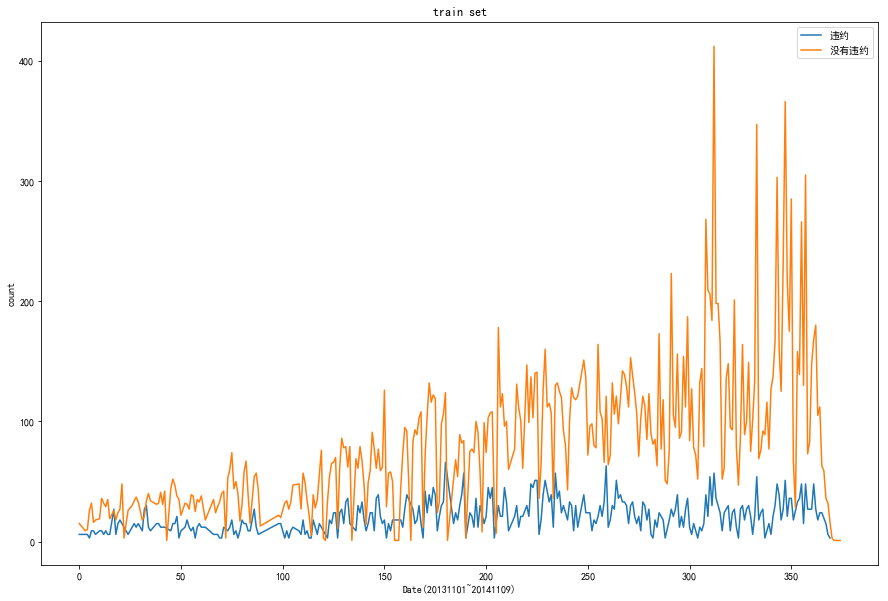

In [6]:
#查看每天成交的业务中违约与没有违约的趋势
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date
plt.rcParams['font.sans-serif']=['SimHei']
train = data
train_1 = train[train.target==1]
temp = train_1[['ListingInfo','target']].groupby('ListingInfo').agg('sum')*3
temp = temp.rename(columns={'target':'count_1'})
temp['date'] = temp.index
temp.date = temp.date.apply(lambda x:(date(int(x.split('/')[0]),int(x.split('/')[1]),int(x.split('/')[2]))-date(2013,11,1)).days)
temp = temp.sort_values('date')

train_0 = train[train.target==0]
train_0['target'] = 1
temp_0 = train_0[['ListingInfo','target']].groupby('ListingInfo').agg('sum')
temp_0 = temp_0.rename(columns={'target':'count_0'})
temp_0['date'] = temp_0.index
temp_0.date = temp_0.date.apply(lambda x:(date(int(x.split('/')[0]),int(x.split('/')[1]),int(x.split('/')[2]))-date(2013,11,1)).days)
temp_0 = temp_0.sort_values('date')

fig,ax = plt.subplots(figsize=(15,10),facecolor="white")
plt.title('train set')
plt.plot(temp['date'].values,temp['count_1'].values,label='违约')
plt.plot(temp_0['date'].values,temp_0['count_0'].values,label='没有违约')
plt.xlabel('Date(20131101~20141109)')
plt.ylabel('count')
plt.legend()
plt.show()


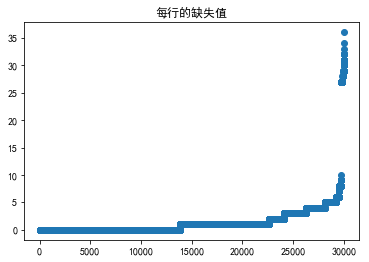

In [7]:
#查看各个样本的缺失值数量
def null_c(col):
    col_null=pd.isnull(col)
    null_list=col[col_null]
    return(len(null_list))
null_count=data.apply(null_c,axis=1) 
null_count=null_count.sort_values()
fig = plt.figure(facecolor="white")
plt.title('每行的缺失值')
plt.scatter(range(1,len(null_count)+1),null_count)

## 去掉缺失值过多的样本

In [8]:
#去掉缺失值明显过多的样本
data.dropna(thresh=203,inplace=True)
data.shape

(29746, 212)

## 查看特征方差

In [9]:
#提取数字类型的特征并计算特征标准差
from pandas.api.types import is_numeric_dtype
numlist=[]
for i in data.columns:
    if is_numeric_dtype(data[i])==True:
        numlist.append(data[i])
data_num = pd.concat(numlist,axis=1)

In [10]:
#查看各个特征的标准差
std_list=[]
for i in data_num.columns:
    std_list.append(data_num[i].std())
std_list.sort()
std_list   

[0.0,
 0.0,
 0.015338783832169531,
 0.020081493922273624,
 0.028980674809234802,
 0.034284654785017715,
 0.03666214433759035,
 0.039304533871432255,
 0.04217936042213691,
 0.0521510103010912,
 0.053136211897195855,
 0.06372485355090719,
 0.07049885210581525,
 0.07908534051168882,
 0.08375747038349486,
 0.08747684413958635,
 0.10494926121153614,
 0.11355233375126388,
 0.11623172655931659,
 0.11903769095613286,
 0.12101259400283282,
 0.12503347545667995,
 0.12661252777230406,
 0.12741469643312955,
 0.1389839210775817,
 0.15095557282623623,
 0.1510528875381066,
 0.1636335585960943,
 0.16928083866908758,
 0.17034837179951573,
 0.17436956974905235,
 0.17696296321677907,
 0.17726079166474543,
 0.181225499582598,
 0.18222666391460035,
 0.1838270103293046,
 0.18560059990836456,
 0.19705759125097866,
 0.2225070729877609,
 0.24168239784202072,
 0.24272513860623265,
 0.25677490527603325,
 0.26094165467506797,
 0.3357170850287152,
 0.35829506277730344,
 0.4019601920036582,
 0.4113678749308891,
 0.

## 部分特征方差小于0.1，接近常量，去掉这部分特征

In [11]:
#剔除方差小于0.1的特征
def drop_col(df, col_name, cutoff=0.1):
    try:
        std = df[col_name].std()
    except:
        std=1
    if std < cutoff:
        df.drop(col_name, axis=1, inplace=True)
for i in data.columns:
    drop_col(data,i)
data.shape

(29746, 196)

## 利用xgboost，对数字类型的特征，进行特征重要性排序，清洗缺失了过多重要特征的样本

In [12]:
#利用众数填充缺失值
import copy
data_notnull = copy.deepcopy(data)
for i in data_notnull.columns:
    data_notnull[i].fillna(data[i].mode()[0],inplace=True)

In [13]:
#提取数字特征
numlist=[]
for i in data_notnull.columns:
    if is_numeric_dtype(data_notnull[i])==True:
        numlist.append(data_notnull[i])
data_num = pd.concat(numlist,axis=1)


In [14]:
#利用xgboost进行特征重要性排序
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance
x = data_num.drop(['Idx','target'],axis=1)
y = data_num['target']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=7)                      
model = XGBClassifier(objective='rank:pairwise',scale_pos_weight=float(len(y_train)-sum(y_train))/float(sum(y_train)))
model.fit(X_train,y_train,eval_metric='auc')    
model.get_booster().get_score(importance_type='total_gain')

{'ThirdParty_Info_Period2_6': 4094.1212319,
 'ThirdParty_Info_Period6_1': 2482.6801514999997,
 'UserInfo_15': 1360.197028,
 'ThirdParty_Info_Period4_6': 1533.132935,
 'WeblogInfo_6': 2509.5039702,
 'UserInfo_14': 3296.7377855065,
 'ThirdParty_Info_Period5_1': 2082.3512257999996,
 'UserInfo_18': 765.4283448,
 'ThirdParty_Info_Period2_15': 2024.6347839999996,
 'ThirdParty_Info_Period5_4': 557.5840228000001,
 'ThirdParty_Info_Period4_1': 398.8225136,
 'Education_Info5': 974.9205367999999,
 'ThirdParty_Info_Period4_15': 1852.9656745999998,
 'WeblogInfo_4': 545.9507503,
 'ThirdParty_Info_Period6_14': 404.24126020000006,
 'ThirdParty_Info_Period3_6': 913.5187600790001,
 'ThirdParty_Info_Period1_10': 1281.9792198200003,
 'WeblogInfo_15': 358.1827394,
 'Education_Info1': 1524.8691446,
 'ThirdParty_Info_Period2_8': 159.24684530000002,
 'ThirdParty_Info_Period5_5': 663.2676087,
 'ThirdParty_Info_Period3_10': 773.9788513999999,
 'ThirdParty_Info_Period6_2': 1220.8064897000002,
 'ThirdParty_Info_P

In [15]:
#提取前20个重要特征
importance=model.get_booster().get_score(importance_type='total_gain')
importance = sorted(importance.items(), key=lambda v: v[1],reverse=True)
importance = importance[:20]
important_feature = []
for i in importance:
    important_feature.append(i[0])
important_feature

['ThirdParty_Info_Period2_6',
 'UserInfo_14',
 'WeblogInfo_6',
 'ThirdParty_Info_Period6_1',
 'ThirdParty_Info_Period5_1',
 'ThirdParty_Info_Period2_15',
 'ThirdParty_Info_Period4_15',
 'UserInfo_16',
 'UserInfo_17',
 'ThirdParty_Info_Period4_6',
 'Education_Info1',
 'UserInfo_15',
 'ThirdParty_Info_Period1_10',
 'ThirdParty_Info_Period1_15',
 'ThirdParty_Info_Period6_2',
 'ThirdParty_Info_Period2_3',
 'ThirdParty_Info_Period3_5',
 'Education_Info5',
 'ThirdParty_Info_Period3_6',
 'ThirdParty_Info_Period6_9']

In [16]:
#删除重要特征缺失过多的样本
drop_list=[]
for raw_name in data.index:
    raw = data.loc[raw_name,:]
    if len(set(list(raw.index[np.where(pd.isnull(raw))]))&set(important_feature)) > 10:
        drop_list.append(raw_name)        
data.drop(index=drop_list,inplace=True)

## 文本特征数据清洗

In [17]:
#去掉首尾空格，去掉省市名称后面的‘省’、‘市’等字
import string
def format_str(s):
    try:
        s=s.strip().translate(str.maketrans('','','省')).translate(str.maketrans('','','市')).translate(str.maketrans('','','自治区')).translate(str.maketrans('','','回族自治区')).translate(str.maketrans('','','壮族自治区')).translate(str.maketrans('','','维吾尔自治区'))            
    except:
        pass
    return s
from pandas.api.types import is_string_dtype
for i in data.columns:
    if is_string_dtype(data[i])==True:
            data[i]=data[i].map(format_str)

## 省分特征处理，提取高比例违约省份，根据是否是高违约比例省份，将省份特征转为二值特征

In [18]:
#计算每个省中违约的比例
data_province1=data.groupby('UserInfo_7')['target'].mean()
data_province2=data.groupby('UserInfo_19')['target'].mean()
data_province = (data_province1+data_province2)/2
data_province=data_province.sort_values(ascending=False)

In [19]:
#提取违约比例前7高的省份
province=[]
for i in data_province.index[:7]:
    province.append(i)

In [20]:
#构建省份特征，若在高比例省份则特征值为1，否则为0
data['province_feature']=0
data['province_feature'][data['UserInfo_7'].isin(province)]=1
data['province_feature'][data['UserInfo_19'].isin(province)]=1    

D:\bcxx\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\bcxx\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [21]:
#删除原省份信息特征列
data.drop(['UserInfo_7','UserInfo_19'],axis=1,inplace=True)

## 市特征处理，一线城市合并赋值为1，二线三线同理

In [22]:
#根据城市等级赋值
def city_level(data,col_name):
    first = ['北京','上海','广州','深圳','天津']
    second = ['杭州','南京','济南','重庆','青岛','大连','宁波','厦门','成都','武汉','哈尔滨','沈阳','西安','长春','长沙','福州','郑州','石家庄','苏州','佛山','东莞','无锡','烟台','太原','合肥','南昌','南宁','昆明','温州','淄博','唐山']                  
    data[col_name][data[col_name].isin(first)]=1 
    data[col_name][data[col_name].isin(second)]=2
    data[col_name][(data[col_name]!=1)&(data[col_name]!=2)]=3
for i in ['UserInfo_2','UserInfo_4','UserInfo_8','UserInfo_20']:
    city_level(data,i)

D:\bcxx\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\bcxx\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\bcxx\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


## 电话运营商特征处理，移动1联通2电信3

In [23]:
data['UserInfo_9'][data['UserInfo_9']=='中国移动']=1
data['UserInfo_9'][data['UserInfo_9']=='中国联通']=2
data['UserInfo_9'][data['UserInfo_9']=='中国电信']=3

D:\bcxx\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\bcxx\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\bcxx\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## 日期处理，将日期变量转化为天数连续值

In [24]:
from datetime import date
data['date'] = data['ListingInfo'].apply(lambda x:(date(int(x.split('/')[0]),int(x.split('/')[1]),int(x.split('/')[2]))-date(2013,11,1)).days)
data.drop(['ListingInfo'],axis=1,inplace=True)

In [25]:
#众数填充缺失值
for i in data.columns:
    data[i].fillna(data[i].mode()[0],inplace=True)

## 对于WeblogInfo_20这一列特征采用独热编码

In [26]:
data = pd.get_dummies(data)

In [27]:
data.to_csv('treated_data.csv')